### HEART DISEASE PREDICTION 

#### OBJECTIVE : To predict whether a patient has heart disease 

<br>Data can be downloaded at https://www.kaggle.com/ronitf/heart-disease-uci </br>
##### Attributes 
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

### Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Importing data

In [7]:
data=pd.read_csv('C:/Users/shwer/data/heart.csv')

In [8]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Understanding the data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Observation: Data consists of records of 303 patients 

## Understanding the data

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,708.000000,720.000000,720.000000
mean,54.225000,0.618056,1.173611,159.065278,242.956944,0.259722,0.586111,150.641667,0.293056,1.012861,1.311111,0.639831,2.202778,0.515278
std,9.109865,0.486201,1.102090,51.282142,47.365117,0.438787,0.514952,21.378877,0.455480,1.130866,0.663274,0.987300,0.615509,0.500114
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,125.000000,207.750000,0.000000,0.000000,138.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,1.000000,1.000000,140.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,177.000000,272.000000,1.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,300.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Observations: Get details about the data like mean, standard deviation, maximum and minimum values

#### To check null values in data

In [11]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Observations: No null values in the data

##### Exploratory Data Analysis to get insights about the data

Text(0.5, 1.0, 'Heart Disease or not with respect to different chest pain types')

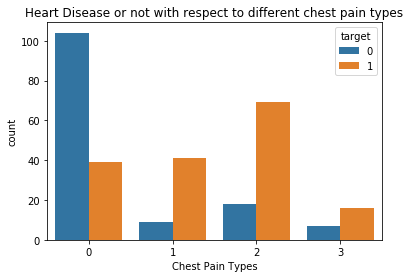

In [13]:
# Plotting Countplot
sns.countplot(x='cp',hue='target',data=data)
plt.xlabel("Chest Pain Types")
plt.title("Heart Disease or not with respect to different chest pain types")

### Observations:
1. Majority of patients have chest pain type 0 .
2. Patients having chest pain type 0 has more chances of not having heart disease while rest of patients having different chest pain types have more chances of having heart disease 

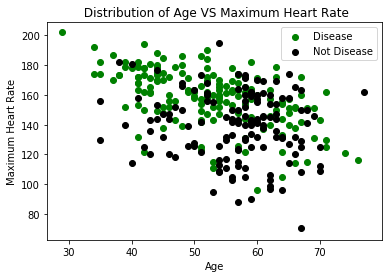

In [14]:
# Plotting scatter plot
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)], c = 'black')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.title(" Distribution of Age VS Maximum Heart Rate")
plt.show()

### Observations
1. As Age increases chances of getting heart disease is more.
2. Between Age 50 and 70 patients have more chances of heart disease

Text(0.5, 0, 'Age')

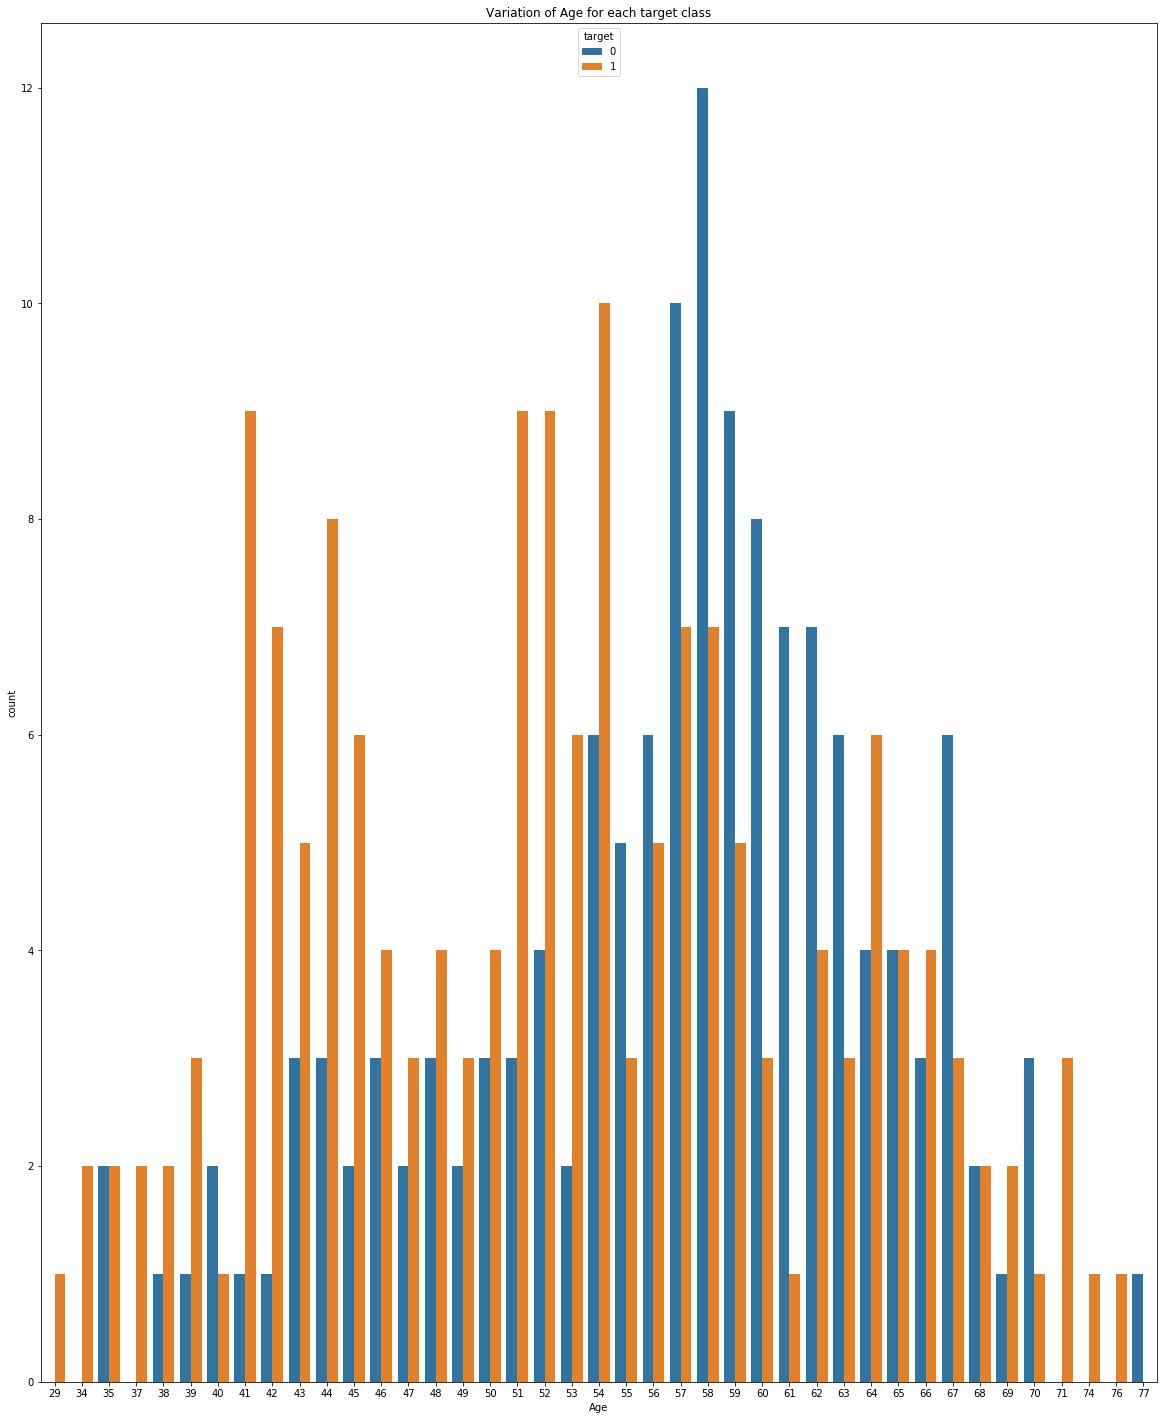

In [15]:
# Plotting Variation of Age Countplot
plt.figure(figsize=(20,25))
sns.countplot(x='age',hue='target',data=data)
plt.title('Variation of Age for each target class')
plt.xlabel("Age")

##### Correlation Matrix

In [16]:
corrmat=data.corr()

In [17]:
corrmat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


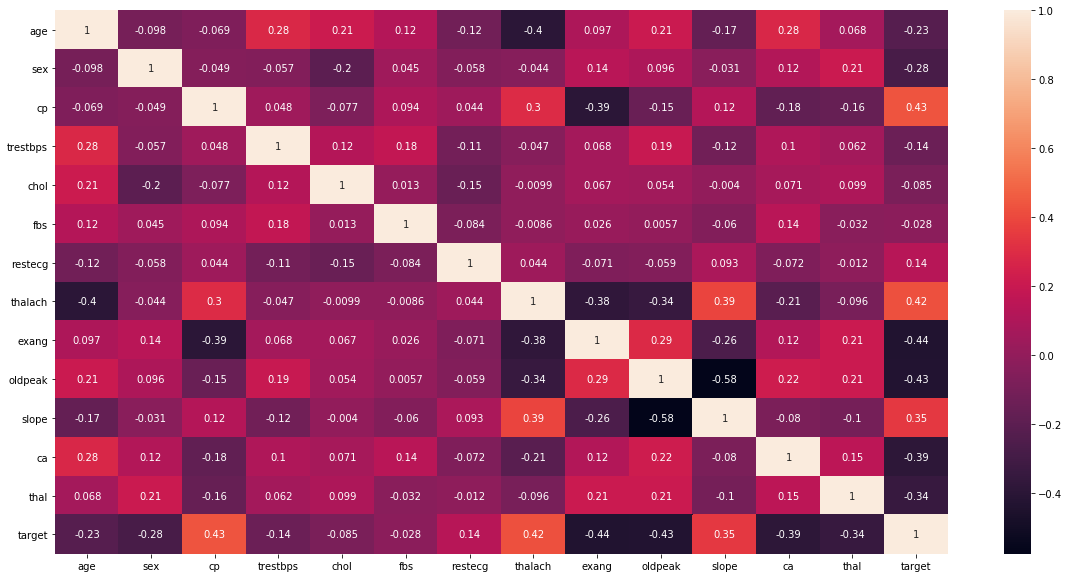

In [18]:
# Plot correlation matrix
fig, ax=plt.subplots(figsize=(20,10))
sns.heatmap(corrmat, annot=True)

##### Observations:
1. Chest pain type, thalach(Maximum Heart Rate) and slope are highly correlated with getting disease
2. Exang, Oldpeak, ca are highly negatively correlated with getting a heart disease

#### Distribution of values for each attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000175F4D45188>,
      dtype=object)

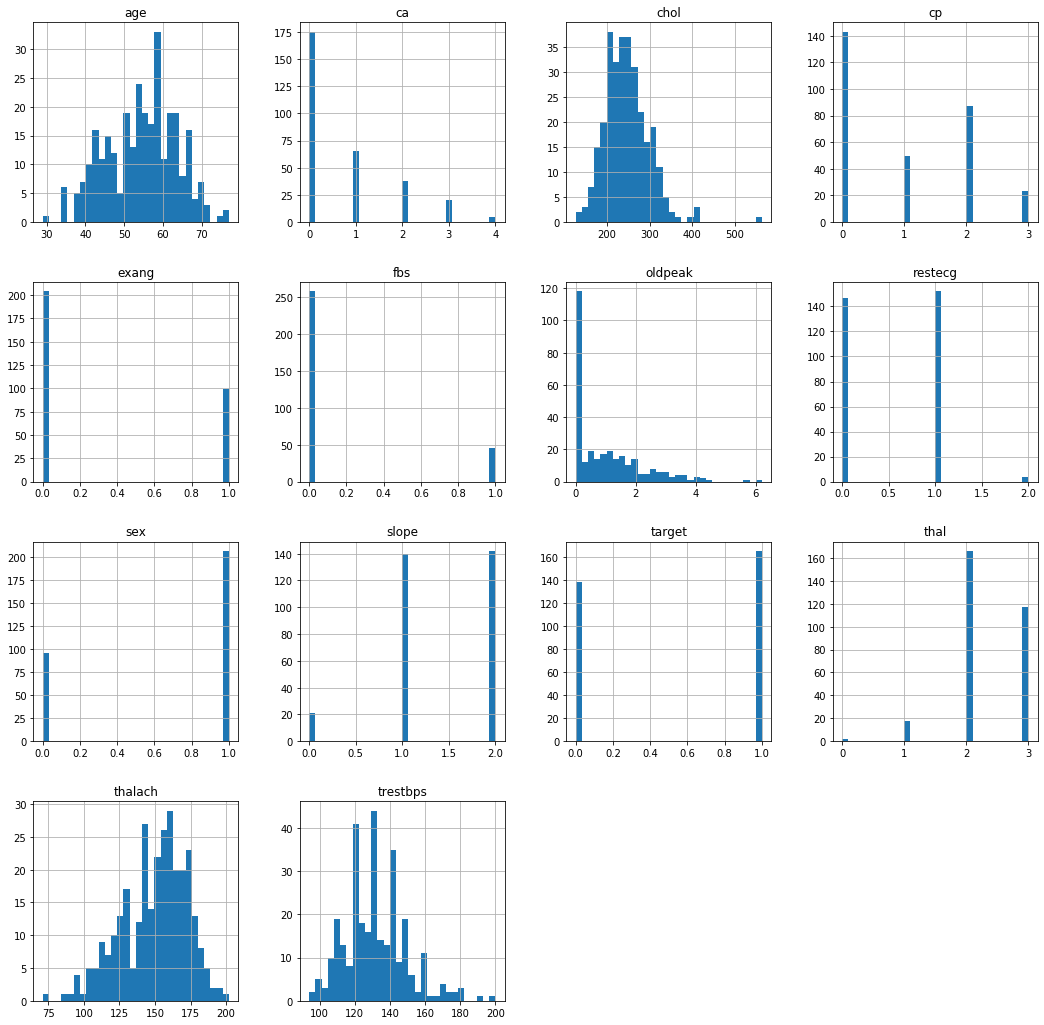

In [19]:
fig=plt.figure(figsize=(18,18))
ax=fig.gca()
data.hist(ax=ax,bins=30)


##### To check whether Output is balanced or not

In [20]:
data['target'].value_counts() 

1    165
0    138
Name: target, dtype: int64

###### Output is balanced

##### Joint plot

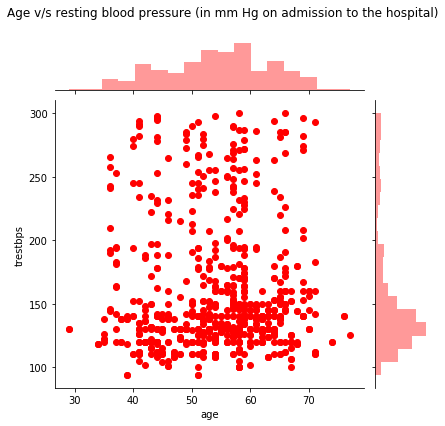

In [20]:
g=sns.jointplot(x="age", y="trestbps", data=data, color="r")
plt.subplots_adjust(top=.9)
g.fig.suptitle('Age v/s resting blood pressure (in mm Hg on admission to the hospital)') 
plt.show()

###### Observations: Patients with age 50-60 records are more and frequency of resting blood pressure is between 100 - 150 is high for patients 

#### Considering all the attributes except the target as independent variable and target as dependent variable

In [21]:
X= data.iloc[:,0:13].values
y=data.iloc[:,13].values

###### Splitting the data into training and test data where 70 % data goes to training and rest to test data

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)

##### Scaling attributes because all the attributes are in different range values so after scaling they all will be in same range

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Using Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
classfier=RandomForestClassifier(n_estimators=10)
classfier.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
y_pred=classfier.predict(X_test)

In [26]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[38,  6],
       [ 6, 41]], dtype=int64)

### Observations: Model correctly predicts most of the data but has some errors.

#### Accuracy

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8681318681318682

### Observations: Getting an accuracy of almost 87 % 

#### Improving the model by using Hyperparameter Tuning Technique randomizedSearchCV

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [31]:
est=RandomForestClassifier(n_jobs=-1)
random_grid={'max_depth':[3,5,10,None],
            'n_estimators':[50,100,150,200,250,300,350,400,450,500],
             'max_features':randint(1,3),
             'criterion':['gini','entropy'],
             'bootstrap': [True,False],
              'min_samples_leaf':randint(1,4)}


###### Creating a function to get best parameters

In [38]:
def hypertuning_rscv(est,random_grid,nbr_iter,X,y):
    rdmsearch=RandomizedSearchCV(est,param_distributions=random_grid,n_jobs=-1,n_iter=nbr_iter,cv=9)
    rdmsearch.fit(X,y)  # Fitting the RandomizedSearchCV on data
    ht_params=rdmsearch.best_params_ # Getting best parameters 
    ht_score=rdmsearch.best_score_ # Getting Score of randomziedSearchCV
    return ht_params,ht_score

In [39]:
rf_parameters, rf_ht_score=hypertuning_rscv(est,random_grid,40,X,y)

In [40]:
rf_parameters

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 2,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [44]:
# creating again new object classifier
classifier=RandomForestClassifier(n_jobs=-1, n_estimators=100,criterion='entropy',min_samples_leaf=1,max_features=2)

In [45]:
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(classifier,X,y,cv=10,scoring='accuracy').mean()

In [46]:
cross_val

0.8281720430107526

##### Observations: Accuracy is 83 % 

##### Trying DecisionTree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
y_pred1=classifier.predict(X_test)

In [49]:
cm=confusion_matrix(y_test,y_pred1)
cm


array([[33, 11],
       [14, 33]], dtype=int64)

#### Observations: Model correctly predicts most of data but misclassfies some data

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8681318681318682

#### Observations: Accuracy is 86 % 

### Trying Artifical Neural Network

In [51]:
# Importing ANN libraries
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [52]:
# initialize ANN
classifier=Sequential()

In [53]:
# Add input layer and 1st hidden layer where units =10 suggest it has 10 neurons in the layer, relu as standard activation and input _dim = 13 because we have 13 independent variables
classifier.add(Dense(units=10,kernel_initializer='uniform',activation='relu',input_dim=13))

In [54]:
# add second hidden layer
classifier.add(Dense(units=10,kernel_initializer='uniform',activation='relu'))

In [55]:
# Add output layer
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [56]:
# compiling ANN where using adam as optimizer, binary crossentropy as loss function and metrics as accuracy
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
# Fitting ANN
classifier.fit(X_train,y_train,batch_size=10,nb_epoch=100)

Epoch 1/100
212/212 [==============================] - 0s 712us/step - loss: 0.6929 - accuracy: 0.4906
Epoch 2/100
212/212 [==============================] - 0s 142us/step - loss: 0.6913 - accuracy: 0.5566
Epoch 3/100
212/212 [==============================] - 0s 137us/step - loss: 0.6848 - accuracy: 0.5566
Epoch 4/100
212/212 [==============================] - 0s 137us/step - loss: 0.6665 - accuracy: 0.6274
Epoch 5/100
212/212 [==============================] - 0s 146us/step - loss: 0.6306 - accuracy: 0.8019
Epoch 6/100
212/212 [==============================] - 0s 151us/step - loss: 0.5771 - accuracy: 0.8396
Epoch 7/100
212/212 [==============================] - 0s 152us/step - loss: 0.5231 - accuracy: 0.8443
Epoch 8/100
212/212 [==============================] - 0s 143us/step - loss: 0.4744 - accuracy: 0.8491
Epoch 9/100
212/212 [==============================] - 0s 141us/step - loss: 0.4368 - accuracy: 0.8585
Epoch 10/100
212/212 [==============================] - 0s 150us/step - l

In [58]:
# predicting for test data
y_pred=classifier.predict(X_test)

In [59]:
# If y_pred value is greater than 0.5 then we are deciding that patient has heart disease
y_pred=(y_pred>0.5)

In [60]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [61]:
cm

array([[35,  9],
       [ 5, 42]], dtype=int64)

#### Observations: Model greatly predicts correctly but has very few errors in classification

#### Accuracy Score

In [62]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)

In [63]:
ac

0.8461538461538461

### Observations: Accuracy Score is almost 85 % 

### Trying K Nearest Neighbor (KNN) algorithm

In [68]:
# find K value i.e. neigbor value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
accuracy_rate=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10)
    accuracy_rate.append(score.mean())

###### Plot K Value and Accuracy Rate

Text(0, 0.5, 'AccuracyRate')

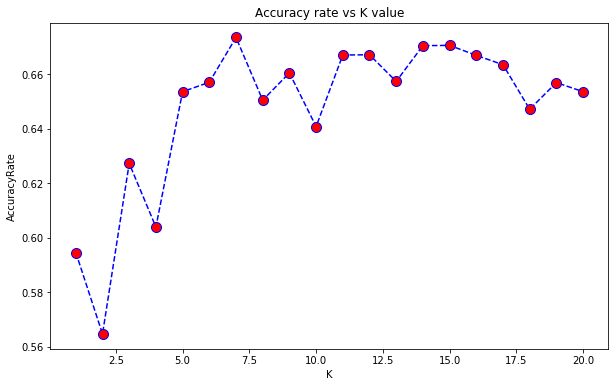

In [69]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("Accuracy rate vs K value")
plt.xlabel('K')
plt.ylabel("AccuracyRate")

In [70]:
# Getting Error rate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
error_rate=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'ErrorRate')

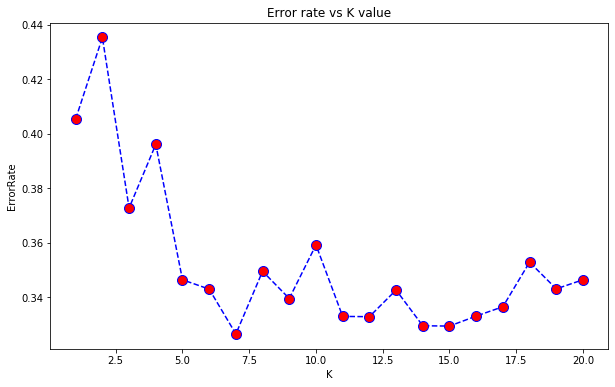

In [71]:
# Plot K value and error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,21),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("Error rate vs K value")
plt.xlabel('K')
plt.ylabel("ErrorRate")

###### Observations:
K =11 we see constant error rate or accuracy rate Choose K=11

In [72]:
# Using KNeigborsClassifier model with K=11 as optimal K value
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [73]:
# Printing confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [74]:
cm

array([[30, 14],
       [ 3, 44]], dtype=int64)

#### Observations: 
Model correctly predicts most of the patient data but has some errors

#### Accuracy 

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8131868131868132

### Observations: 
Accuracy is 81 % 

### Conclusion
Out of all the models Decision Tree and random Forest gives best prediction accuracy whether patient has a heart disease